# Intermediate Linear Regressions and Logistic Regressions

> A Summary of lecture "Linear Regressions & Logistic Regressions in Python", via datacamp

- toc: true 
- badges: true
- comments: true

Now, we are going to fit models that incorporate multiple explanatory variables. This is called multiple regressions. It often gives more insights, and can provide more accurate predictions.

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

sns.set(rc = {'figure.figsize':(11.7,7.27)})
rcParams['figure.figsize'] = 11.7,7.27
sns.set_style("white")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.despine()


<Figure size 842.4x523.44 with 0 Axes>

### Fitting a parallel slopes linear regression
In Introduction to Regression in Python with statsmodels, you learned to fit linear regression models with a single explanatory variable. In many cases, using only one explanatory variable limits the accuracy of predictions. That means that to truly master linear regression, you need to be able to include multiple explanatory variables.

The case when there is one numeric explanatory variable and one categorical explanatory variable is sometimes called a "parallel slopes" linear regression due to the shape of the predictions – more on that in the next exercise.

Here, you'll revisit the Taiwan real estate dataset. Recall the meaning of each variable.

- Pre-processing

In [90]:
import os, sys
import pandas as pd
import numpy as np
path = 'C:/Users/T0230575/source/repos/DataCamp__/Python/_data/'
os.chdir(path)

taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')
print(taiwan_real_estate.head())


   dist_to_mrt_m  n_convenience house_age_years  price_twd_msq
0       84.87882             10        30 to 45      11.467474
1      306.59470              9        15 to 30      12.768533
2      561.98450              5         0 to 15      14.311649
3      561.98450              5         0 to 15      16.580938
4      390.56840              5         0 to 15      13.040847


In [91]:
# Import ols from statsmodels.formula.api
from statsmodels.formula.api import ols

# Fit a linear regr'n of price_twd_msq vs. n_convenience
mdl_price_vs_conv = ols('price_twd_msq~n_convenience', data = taiwan_real_estate).fit()

# Print its coefficients
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [92]:
# Import ols from statsmodels.formula.api
from statsmodels.formula.api import ols

# Fit a linear regr'n of price_twd_msq vs. n_convenience
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience",
                        data=taiwan_real_estate).fit()

# Fit a linear regr'n of price_twd_msq vs. house_age_years, no intercept
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years+0', data=taiwan_real_estate).fit()

# Print its coefficients
print(mdl_price_vs_age.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


In [93]:
# Import ols from statsmodels.formula.api
from statsmodels.formula.api import ols

# Fit a linear regr'n of price_twd_msq vs. n_convenience
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience",
                        data=taiwan_real_estate).fit()

# Fit a linear regr'n of price_twd_msq vs. house_age_years, no intercept
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Fit a linear regr'n of price_twd_msq vs. n_convenience plus house_age_years, no intercept
mdl_price_vs_both = ols('price_twd_msq ~ n_convenience + house_age_years + 0', data=taiwan_real_estate).fit()

# Print its coefficients
print(mdl_price_vs_both.params)

house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457
dtype: float64


Notice how the intercept and slope coefficients change with each model. How do you interpret them? Let's find out in the next exercise.

#### Question
Look at the coefficients of mdl_price_vs_both. What is the meaning of the n_convenience coefficient?

In [94]:
print(mdl_price_vs_both.params)

house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457
dtype: float64


For each additional nearby convenience store, the expected house price, in TWD per square meter, increases by 0.79.

#### Question
What is the meaning of the "0 to 15 years" coefficient?

For a house aged 0 to 15 years with zero nearby convenience stores, the expected house price is 9.41 TWD per square meter.

The model has one slope coefficient, and three intercept coefficients (one for each possible value of the categorical explanatory variable).

### Visualizing each explanatory variable

Being able to see the predictions made by a model makes it easier to understand. In the case where there is only one explanatory variable, seaborn lets you do this without any manual calculation.

To visualize the relationship between a numeric explanatory variable and the numeric response, you can draw a scatter plot with a linear trend line.

To visualize the relationship between a categorical explanatory variable and the numeric response, you can draw a box plot.

taiwan_real_estate is available.

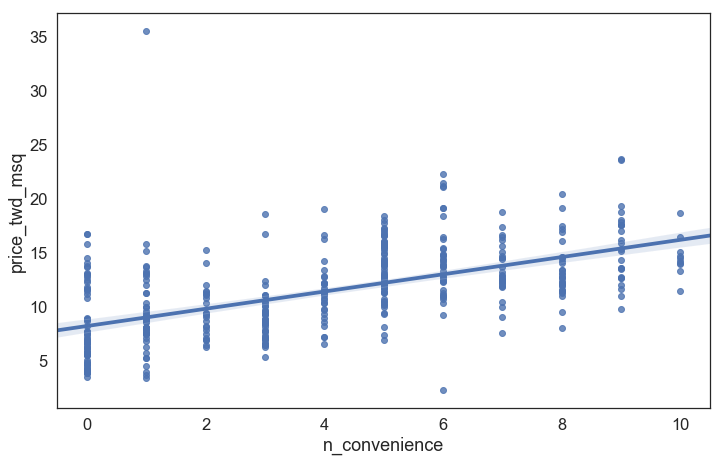

In [95]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Import seaborn
import seaborn as sns

# Using taiwan_real_estate, plot price_twd_msq vs. n_convenience
# as a scatter plot with linear trend line
sns.regplot(x='n_convenience', y='price_twd_msq',data=taiwan_real_estate)

# Show the plot
plt.show()

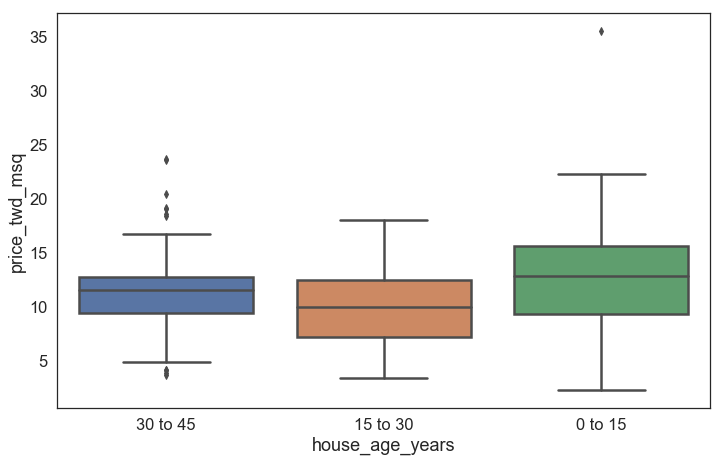

In [96]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Import seaborn as sns
import seaborn as sns

# Using taiwan_real_estate, plot price_twd_msq vs. house_age_years as a boxplot
sns.boxplot(x='house_age_years',y='price_twd_msq',data=taiwan_real_estate)

# Show the plot
plt.show()

With a single numeric explanatory variable, the predictions form a single straight line. With a single categorical explanatory variable, the predictions are the means for each category.

### Visualizing parallel slopes
The two plots in the previous exercise gave very different predictions: one gave a predicted response that increased linearly with a numeric variable; the other gave a fixed response for each category. The only sensible way to reconcile these two conflicting predictions is to incorporate both explanatory variables in the model at once.

When it comes to a linear regression model with a numeric and a categorical explanatory variable, seaborn doesn't have an easy, "out of the box" way to show the predictions.

taiwan_real_estate is available and mdl_price_vs_both is available as a fitted model. seaborn is imported as sns and matplotlib.pyplot is imported as plt.

In [97]:
# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params

# Print coeffs
print(coeffs)

# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope = coeffs

house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457
dtype: float64


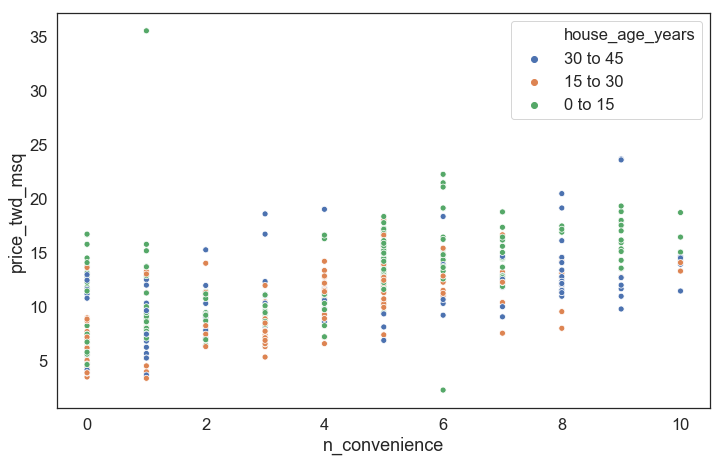

In [98]:
# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params

# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope = coeffs

# Draw a scatter plot of price_twd_msq vs. n_convenience colored by house_age_years
sns.scatterplot(x='n_convenience',y='price_twd_msq', hue='house_age_years', data=taiwan_real_estate)

# Show the plot
plt.show()

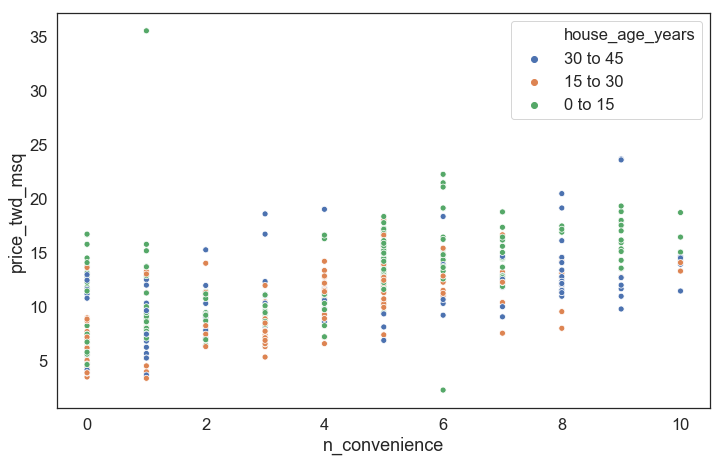

In [99]:
# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params

# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope = coeffs

# Draw a scatter plot of price_twd_msq vs. n_convenience, colored by house_age_years
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                hue="house_age_years",
                data=taiwan_real_estate)

# Add three parallel lines for each category of house_age_years
# Color the line for ic_0_15 blue
# plt.axline(xy1=(0, ic_0_15), slope=slope, color="blue")

# # Color the line for ic_15_30 orange
# plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")
# # Color the line for ic_30_45 green
# plt.axline(xy1=(0, ic_30_45), slope=slope, color="green")

# Show the plot
plt.show()

The "parallel slope" model name comes from the fact that the prediction for each category is a slope, and all those slopes are parallel. The plot allows us to see that newer houses are on average more expensive than houses older than 15 years.

### Predicting with a parallel slopes model
While seaborn can automatically show you model predictions using sns.regplot(), in order to get those values to program with, you'll need to do the calculations yourself.

Just as with the case of a single explanatory variable, the workflow has two steps: create a DataFrame of explanatory variables, then add a column of predictions.

taiwan_real_estate is available and mdl_price_vs_both is available as a fitted model. seaborn, ols(), matplotlib.pyplot, pandas, and numpy are loaded as their default aliases. This will also be the case for the remainder of the course. In addition, ìtertools.product is available as well.

In [100]:
from itertools import product
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 10)

# Extract the unique values of house_age_years
house_age_years = taiwan_real_estate['house_age_years'].unique()

# Create p as all combinations of values of n_convenience and house_age_years (cartesian product)
p = product(n_convenience, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns =['n_convenience','house_age_years'])

# Print it
print(explanatory_data.head(n=10))

   n_convenience house_age_years
0              0        30 to 45
1              0        15 to 30
2              0         0 to 15
3              1        30 to 45
4              1        15 to 30
5              1         0 to 15
6              2        30 to 45
7              2        15 to 30
8              2         0 to 15
9              3        30 to 45


In [101]:
# Create n_convenience as a range of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Extract the unique values of house_age_years
house_age_years = taiwan_real_estate["house_age_years"].unique()

# Create p as all combinations of values of n_convenience and house_age_years
p = product(n_convenience, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=['n_convenience', 'house_age_years'])

# Add predictions to the DataFrame
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_both.predict(explanatory_data)
)

# Print it
print(prediction_data.head(n=10))

   n_convenience house_age_years  price_twd_msq
0              0        30 to 45       7.510958
1              0        15 to 30       7.085169
2              0         0 to 15       9.413325
3              1        30 to 45       8.302415
4              1        15 to 30       7.876627
5              1         0 to 15      10.204782
6              2        30 to 45       9.093873
7              2        15 to 30       8.668084
8              2         0 to 15      10.996239
9              3        30 to 45       9.885330


By adding combinations of explanatory variables, you increase the number of predictions as well. Let's visualize these predictions in the next exercise.

### Visualizing parallel slopes model predictions
To make sure you've got the right predictions from the previous exercise, you can add them to a seaborn plot. To visualize multiple regression predictions, you use the same procedure as with linear regression: draw a scatter plot with a trend line and add a second layer of prediction points on the same plot. As you've seen in a previous exercise, seaborn can't plot the parallel slopes model directly. Therefore, you'll first re-extract the model coefficients before you plot the prediction points.

taiwan_real_estate and prediction_data are available and mdl_price_vs_both is available as a fitted model.

In [102]:
# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params

# Print coeffs
print(coeffs)

# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope  = coeffs

house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457
dtype: float64


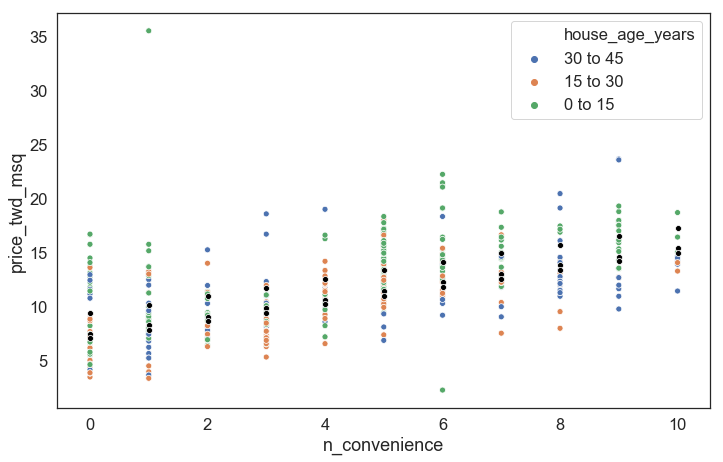

In [103]:
# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params

# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope = coeffs

# Create the parallel slopes plot
# plt.axline(xy1=(0, ic_0_15), slope=slope, color="green")
# plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")
# plt.axline(xy1=(0, ic_30_45), slope=slope, color="blue")
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                hue="house_age_years",
                data=taiwan_real_estate)

# Add the predictions in black
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                color="black",
                data=prediction_data)

# Show the plot
plt.show()

Your predictions lie exactly on the trend lines. Now it is up to you to calculate these predictions manually.

### Manually calculating predictions
As with simple linear regression, you can also manually calculate the predictions from the model coefficients. The only change for the parallel slopes case is that the intercept is different for each category of the categorical explanatory variable. That means you need to consider the case when each each category occurs separately.

taiwan_real_estate, mdl_price_vs_both, and explanatory_data are available; ic_0_15, ic_15_30, ic_30_45, and slope from the previous exercise are also loaded.

In [104]:
# Define conditions
conditions = [
    explanatory_data["house_age_years"] == "0 to 15",
    explanatory_data["house_age_years"] == "15 to 30",
    explanatory_data["house_age_years"] == "30 to 45"]

# Define choices
choices = [ic_0_15, ic_15_30, ic_30_45]

# Create array of intercepts for each house_age_year category
intercept = np.select(conditions, choices)

# Create prediction_data with columns intercept and price_twd_msq
prediction_data = explanatory_data.assign(
    intercept = intercept,
    price_twd_msq = intercept + slope * explanatory_data["n_convenience"])

# Print it
print(prediction_data.head(n=10))

   n_convenience house_age_years  intercept  price_twd_msq
0              0        30 to 45   7.510958       7.510958
1              0        15 to 30   7.085169       7.085169
2              0         0 to 15   9.413325       9.413325
3              1        30 to 45   7.510958       8.302415
4              1        15 to 30   7.085169       7.876627
5              1         0 to 15   9.413325      10.204782
6              2        30 to 45   7.510958       9.093873
7              2        15 to 30   7.085169       8.668084
8              2         0 to 15   9.413325      10.996239
9              3        30 to 45   7.510958       9.885330


Even for more complicated linear regression models, the prediction just involves adding and multiplying coefficients for different conditions of explanatory variables.

### Assessing model performance

With too many explanatory variables, we can get over-fitting.
More explanatory variables means higher R-squared.
It also biais the model fit in the way that it's going to perform relatively well on 1 given dataset, but poorly as soon as we change the data = it cannot be generalized.

So we can use an adjusted coefficient of determination which penalizes more explanatory variables.

rsquared_adj()

### Comparing coefficients of determination
Recall that the coefficient of determination is a measure of how well the linear regression line fits the observed values. An important motivation for including several explanatory variables in a linear regression is that you can improve the fit compared to considering only a single explanatory variable.

Here you'll compare the coefficient of determination for the three Taiwan house price models, to see which gives the best result.

mdl_price_vs_conv, mdl_price_vs_age, and mdl_price_vs_both are available as fitted models.

In [105]:
# Print the coeffs of determination for mdl_price_vs_conv
print("rsquared_conv: ", mdl_price_vs_conv.rsquared)
print("rsquared_adj_conv: ", mdl_price_vs_conv.rsquared_adj)

# Print the coeffs of determination for mdl_price_vs_age
print("rsquared_age: ", mdl_price_vs_age.rsquared)
print("rsquared_adj_age: ", mdl_price_vs_age.rsquared_adj)

# Print the coeffs of determination for mdl_price_vs_both
print("rsquared_both: ", mdl_price_vs_both.rsquared)
print("rsquared_adj_both: ", mdl_price_vs_both.rsquared_adj)

rsquared_conv:  0.32604660851305045
rsquared_adj_conv:  0.32441079931041217
rsquared_age:  0.08382749316665172
rsquared_adj_age:  0.07936923279276686
rsquared_both:  0.39517387968887363
rsquared_adj_both:  0.39074832271098736


#### Question
Which model does the adjusted coefficient of determination suggest gives a better fit?

mdl_price_vs_both

When both explanatory variables are included in the model, the adjusted coefficient of determination is higher, resulting in a better fit.

### Comparing residual standard error
The other common metric for assessing model fit is the residual standard error (RSE), which measures the typical size of the residuals.

RSE can't directly be retrieved using statsmodels, but you can retrieve the mean squared error (MSE) using the .mse_resid attribute. By taking the square root of the MSE, you can get the RSE.

In the last exercise, you saw how including both explanatory variables into the model increased the coefficient of determination. How do you think using both explanatory variables will change the RSE?

mdl_price_vs_conv, mdl_price_vs_age, and mdl_price_vs_both are available as fitted models.

In [106]:
# Print the RSE for mdl_price_vs_conv
print("rse_conv: ", np.sqrt(mdl_price_vs_conv.mse_resid))

# Print the RSE for mdl_price_vs_age
print("rse_age: ", np.sqrt(mdl_price_vs_age.mse_resid))

# Print RSE for mdl_price_vs_both
print("rse_both: ", np.sqrt(mdl_price_vs_both.mse_resid))

rse_conv:  3.383887521343046
rse_age:  3.950183875630859
rse_both:  3.2134602805523236


#### Question
Which model does the RSE suggest gives more accurate predictions?

mdl_price_vs_both

By including both explanatory variables in the model, a lower RSE was achieved, indicating a smaller difference between the predicted responses and the actual responses.

### One model per category
The model you ran on the whole dataset fits some parts of the data better than others. It's worth taking a look at what happens when you run a linear model on different parts of the dataset separately, to see if each model agrees or disagrees with the others.

taiwan_real_estate is available.

In [107]:
# Filter for rows where house age is 0 to 15 years
taiwan_0_to_15 = taiwan_real_estate[taiwan_real_estate['house_age_years'] == "0 to 15"]

# Filter for rows where house age is 15 to 30 years
taiwan_15_to_30 = taiwan_real_estate[taiwan_real_estate['house_age_years'] == "15 to 30"]

# Filter for rows where house age is 30 to 45 years
taiwan_30_to_45 = taiwan_real_estate[taiwan_real_estate['house_age_years'] == "30 to 45"]


In [108]:
# Filter for rows where house age is 0 to 15 years
taiwan_0_to_15 = taiwan_real_estate[taiwan_real_estate["house_age_years"] == "0 to 15"]

# Filter for rows where house age is 15 to 30 years
taiwan_15_to_30 = taiwan_real_estate[taiwan_real_estate["house_age_years"] == "15 to 30"]

# Filter for rows where house age is 30 to 45 years
taiwan_30_to_45 = taiwan_real_estate[taiwan_real_estate["house_age_years"] == "30 to 45"]

# Model price vs. no. convenience stores using 0 to 15 data
mdl_0_to_15 = ols('price_twd_msq~n_convenience', data=taiwan_0_to_15).fit()

# Model price vs. no. convenience stores using 15 to 30 data
mdl_15_to_30 = ols('price_twd_msq~n_convenience', data=taiwan_15_to_30).fit()

# Model price vs. no. convenience stores using 30 to 45 data
mdl_30_to_45 = ols('price_twd_msq~n_convenience', data=taiwan_30_to_45).fit()

# Print the coefficients
print(mdl_0_to_15.params)
print(mdl_15_to_30.params)
print(mdl_30_to_45.params)

Intercept        9.241702
n_convenience    0.833587
dtype: float64
Intercept        6.871919
n_convenience    0.851917
dtype: float64
Intercept        8.113123
n_convenience    0.668698
dtype: float64


You now have three models giving three different answers. Let's visualize the differences, then figure out how to reconcile the differences.

In [109]:
# Create explanatory_data, setting no. of conv stores from  0 to 10
explanatory_data = pd.DataFrame({'n_convenience':np.arange(0, 11)})


In [110]:
# Create explanatory_data, setting no. of conv stores from  0 to 10
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Add column of predictions using "0 to 15" model and explanatory data 
prediction_data_0_to_15 = explanatory_data.assign(
    price_twd_msq = mdl_0_to_15.predict(explanatory_data)
)

# Same again, with "15 to 30"
prediction_data_15_to_30 = explanatory_data.assign(
    price_twd_msq = mdl_15_to_30.predict(explanatory_data)
)

# Same again, with "30 to 45"
prediction_data_30_to_45 = explanatory_data.assign(
    price_twd_msq = mdl_30_to_45.predict(explanatory_data)
)

# Print the results
print(prediction_data_0_to_15)
print(prediction_data_15_to_30)
print(prediction_data_30_to_45)

    n_convenience  price_twd_msq
0               0       9.241702
1               1      10.075289
2               2      10.908876
3               3      11.742462
4               4      12.576049
5               5      13.409636
6               6      14.243222
7               7      15.076809
8               8      15.910396
9               9      16.743982
10             10      17.577569
    n_convenience  price_twd_msq
0               0       6.871919
1               1       7.723836
2               2       8.575753
3               3       9.427670
4               4      10.279588
5               5      11.131505
6               6      11.983422
7               7      12.835339
8               8      13.687257
9               9      14.539174
10             10      15.391091
    n_convenience  price_twd_msq
0               0       8.113123
1               1       8.781822
2               2       9.450520
3               3      10.119218
4               4      10.787916
5         

Now that you have predictions for each model, let's see how they compare.

### Visualizing multiple models
In the last two exercises, you ran models for each category of house ages separately, then calculated predictions for each model. Now it's time to visualize those predictions to see how they compare.

When you use sns.lmplot() with the hue argument set to the categorical variable, you get multiple trend lines, each with their own slope. This is in contrast with the parallel slopes model you saw in Chapter 1, where all models had the same slope.

taiwan_real_estate is available. prediction_data is loaded as a concatenated DataFrame of all house ages.

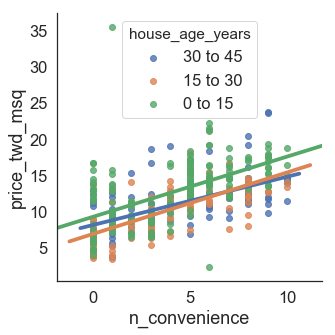

In [111]:
# Plot the trend lines of price_twd_msq vs. n_convenience
# grouped by house_age_years
sns.lmplot(x='n_convenience',
     y='price_twd_msq',
     data=taiwan_real_estate,
     hue='house_age_years',
     ci=None,
     legend_out=False)

# Show the plot
plt.show()

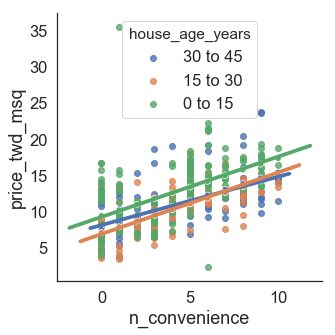

In [112]:
# Plot the trend lines of price_twd_msq vs. n_convenience
# grouped by house_age_years
sns.lmplot(x="n_convenience",
           y="price_twd_msq",
           data=taiwan_real_estate,
           hue="house_age_years",
           ci=None,
           legend_out=False)

# Add a scatter plot for prediction_data
sns.scatterplot(x='n_convenience', y='price_twd_msq', hue='house_age_years', data=prediction_data,
     legend=False)

# Show the plot
plt.show()

It's a good sign that our predictions match those of lmplot's. Notice that the 30 to 45 year house age group has a much shallower slope compared to the other lines.

### Assessing model performance
To test which approach is best – the whole dataset model or the models for each house age category – you need to calculate some metrics. Here, you'll compare the coefficient of determination and the residual standard error for each model.

Four models of price versus no. of convenience stores (mdl_all_ages, mdl_0_to_15, mdl_15_to_30, and mdl_30_to_45) are available.

In [113]:
mdl_all_ages = ols('price_twd_msq ~ n_convenience', data = taiwan_real_estate).fit()

# Print the coeff. of determination for mdl_all_ages
print("R-squared for mdl_all_ages: ", mdl_all_ages.rsquared)

# Print the coeff. of determination for mdl_0_to_15
print("R-squared for mdl_0_to_15: ", mdl_0_to_15.rsquared)

# Print the coeff. of determination for mdl_15_to_30
print("R-squared for mdl_15_to_30: ", mdl_15_to_30.rsquared)

# Print the coeff. of determination for mdl_30_to_45
print("R-squared for mdl_30_to_45: ", mdl_30_to_45.rsquared)

R-squared for mdl_all_ages:  0.32604660851305045
R-squared for mdl_0_to_15:  0.3120536339435179
R-squared for mdl_15_to_30:  0.4424604869682426
R-squared for mdl_30_to_45:  0.3125713334387281


In [114]:
# Print the RSE for mdl_all_ages
print("RSE for mdl_all_ages: ", np.sqrt(mdl_all_ages.mse_resid))

# Print the RSE for mdl_0_to_15
print("RSE for mdl_0_to_15: ", np.sqrt(mdl_0_to_15.mse_resid))

# Print the RSE for mdl_15_to_30
print("RSE for mdl_15_to_30: ", np.sqrt(mdl_15_to_30.mse_resid))

# Print the RSE for mdl_30_to_45
print("RSE for mdl_30_to_45: ", np.sqrt(mdl_30_to_45.mse_resid))


RSE for mdl_all_ages:  3.383887521343046
RSE for mdl_0_to_15:  3.5641269936319704
RSE for mdl_15_to_30:  2.5852728709073385
RSE for mdl_30_to_45:  3.239037479434981


 It seems that both metrics for the 15 to 30 age group model are much better than those for the whole dataset model, but the models for the other two age groups are similar to the whole dataset model. Thus using individual models will improve predictions for 15 to 30 age group.

### One model with an interaction

We have to be honest, browsing like this into so many models & variables and handling so much code is a pain. How can we improve this ?

By specifying interactions between explanatory variables.
Features interact between one another. The effect of one explan. variable on the expected response changes depending on the value of another explan. variable.

This is called interaction (a bit like Butterfly effect at the scale of our explan. variable population).

Defining a model with interactions is such as we insert multiple variables after the ~ inside the formula. But remember that as we do this, the model gets more complex.

### Specifying an interaction
So far you used a single parallel slopes model, which gave an OK fit for the whole dataset, then three separate models for each house age category, which gave a better fit for each individual category, but was clunky because you had three separate models to work with and explain. Ideally, you'd have a single model that had all the predictive power of the individual models.

Defining this single model is achieved through adding interactions between explanatory variables. The syntax of statsmodels.formula is flexible, and gives you a couple of options, depending on whether you prefer concise code that is quick to type and to read, or explicit code that describes what you are doing in detail.

taiwan_real_estate is available.

In [115]:
# Model price vs both with an interaction using "times" syntax
mdl_price_vs_both_inter = ols('price_twd_msq ~ n_convenience * house_age_years', data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_both_inter.params)

# Interaction is implicit.

Intercept                                    9.241702
house_age_years[T.15 to 30]                 -2.369784
house_age_years[T.30 to 45]                 -1.128579
n_convenience                                0.833587
n_convenience:house_age_years[T.15 to 30]    0.018331
n_convenience:house_age_years[T.30 to 45]   -0.164889
dtype: float64


In [116]:
# Model price vs both with an interaction using "colon" syntax
mdl_price_vs_both_inter = ols("price_twd_msq ~ n_convenience + house_age_years + n_convenience:house_age_years",
                              data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_both_inter.params)

Intercept                                    9.241702
house_age_years[T.15 to 30]                 -2.369784
house_age_years[T.30 to 45]                 -1.128579
n_convenience                                0.833587
n_convenience:house_age_years[T.15 to 30]    0.018331
n_convenience:house_age_years[T.30 to 45]   -0.164889
dtype: float64


Notice that the model coefficients are the same in each case. The formula syntax is very flexible, giving you a choice between 'easy to type' and 'very explicit', depending on your preference.

1. No interactions
response ~ explntry1 + explntry2

2. With interactions (implicit)
response_var ~ explntry1 * explntry2

3. With interactions (explicit)
response ~ explntry1 + explntry2 + explntry1:explntry2

4. No interactions
mass_g ~ length_cm + species

5. With interactions (implicit)
mass_g ~ length_cm * species
6. With interactions (explicit)
mass_g ~ length_cm + species + length_cm:species

### Interactions with understandable coeffs
The previous model with the interaction term returned coefficients that were a little tricky to interpret. In order clarify what the model is predicting, you can reformulate the model in a way that returns understandable coefficients. For further clarity, you can compare the results to the models on the separate house age categories (mdl_0_to_15, mdl_15_to_30, and mdl_30_to_45).

taiwan_real_estate, mdl_0_to_15, mdl_15_to_30, and mdl_30_to_45 are available.

In [117]:
# Model price vs. house age plus an interaction, no intercept
mdl_readable_inter = ols('price_twd_msq~house_age_years + n_convenience:house_age_years + 0',data=taiwan_real_estate).fit()

# Print the coefficients for mdl_0_to_15
print("mdl_0_to_15 coefficients:", "\n", mdl_0_to_15.params)

# Print the coefficients for mdl_15_to_30
print("mdl_15_to_30 coefficients:", "\n", mdl_15_to_30.params)

# Print the coefficients for mdl_30_to_45
print("mdl_30_to_45 coefficients:", "\n", mdl_30_to_45.params)

# Print the coefficients for mdl_readable_inter
print("\n", "mdl_readable_inter coefficients: ", "\n", mdl_readable_inter.params)

mdl_0_to_15 coefficients: 
 Intercept        9.241702
n_convenience    0.833587
dtype: float64
mdl_15_to_30 coefficients: 
 Intercept        6.871919
n_convenience    0.851917
dtype: float64
mdl_30_to_45 coefficients: 
 Intercept        8.113123
n_convenience    0.668698
dtype: float64

 mdl_readable_inter coefficients:  
 house_age_years[0 to 15]                   9.241702
house_age_years[15 to 30]                  6.871919
house_age_years[30 to 45]                  8.113123
n_convenience:house_age_years[0 to 15]     0.833587
n_convenience:house_age_years[15 to 30]    0.851917
n_convenience:house_age_years[30 to 45]    0.668698
dtype: float64


#### Question
Which statement about the coefficients of mdl_readable_inter is true?

The expected increase in house price for each nearby convenience store is lowest for the 30 to 45 year age group.

Sometimes fiddling about with how the model formula is specified makes it easier to interpret the coefficients. In this version, you can see how each category has its own intercept and slope (just like the 3 separate models had).

### Predicting with interactions
As with every other regression model you've created, the fun part is making predictions. Fortunately, the code flow for this case is the same as the one without interactions – statsmodels can handle calculating the interactions without any extra prompting from you. The only thing you need to remember is the trick for getting combinations of explanatory variables.

mdl_price_vs_both_inter is available as a fitted model, itertools.product is loaded.

In [118]:
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 10)

# Extract the unique values of house_age_years
house_age_years = taiwan_real_estate['house_age_years'].unique()

# Create p as all combinations of values of n_convenience and house_age_years
p = product(n_convenience, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=['n_convenience','house_age_years'])

# Print it
print(explanatory_data.head(n=10))

   n_convenience house_age_years
0              0        30 to 45
1              0        15 to 30
2              0         0 to 15
3              1        30 to 45
4              1        15 to 30
5              1         0 to 15
6              2        30 to 45
7              2        15 to 30
8              2         0 to 15
9              3        30 to 45


In [119]:
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Extract the unique values of house_age_years
house_age_years = taiwan_real_estate["house_age_years"].unique()

# Create p as all combinations of values of n_convenience and house_age_years
p = product(n_convenience, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "house_age_years"])

# Add predictions to the DataFrame
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_both_inter.predict(explanatory_data)
)

# Print it
print(prediction_data.head(n=10))

   n_convenience house_age_years  price_twd_msq
0              0        30 to 45       8.113123
1              0        15 to 30       6.871919
2              0         0 to 15       9.241702
3              1        30 to 45       8.781822
4              1        15 to 30       7.723836
5              1         0 to 15      10.075289
6              2        30 to 45       9.450520
7              2        15 to 30       8.575753
8              2         0 to 15      10.908876
9              3        30 to 45      10.119218


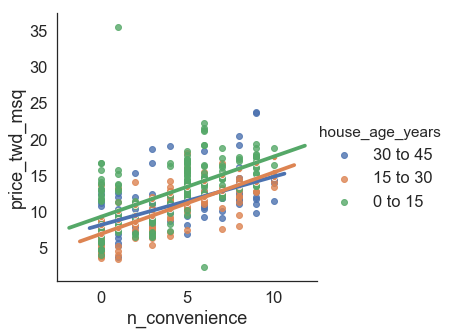

In [120]:
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Extract the unique values of house_age_years
house_age_years = taiwan_real_estate["house_age_years"].unique()

# Create p as all combinations of values of n_convenience and house_age_years
p = product(n_convenience, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "house_age_years"])

# Add predictions to the DataFrame
prediction_data = explanatory_data.assign( 
      price_twd_msq = mdl_price_vs_both_inter.predict(explanatory_data))

# Plot the trend lines of price_twd_msq vs. n_convenience
# grouped by house_age_years
sns.lmplot(x='n_convenience',y='price_twd_msq', hue='house_age_years', ci=None, data=taiwan_real_estate)

# Add a scatter plot for prediction_data
sns.scatterplot(x='n_convenience',y='price_twd_msq',data=prediction_data,
     legend=False)

# Show the plot
plt.show()

The code flow here is identical to the parallel slopes case in Chapter 1. Take a look again at that exercise to check.

### Manually calculating predictions with interactions
In order to understand how .predict() works, it's time to calculate the predictions manually again. For this model, there are three separate lines to calculate for, and in each one, the prediction is an intercept plus a slope times the numeric explanatory value. The tricky part is getting the right intercept and the right slope for each case.

mdl_price_vs_both_inter and explanatory_data are available.

In [121]:
# Get the coefficients from mdl_price_vs_both_inter
coeffs = mdl_price_vs_both_inter.params

# Assign each of the elements of coeffs
ic_0_15, ic_15_30, ic_30_45, slope_0_15, slope_15_30, slope_30_45 = coeffs

In [122]:
# Get the coefficients from mdl_price_vs_both_inter
coeffs = mdl_price_vs_both_inter.params

# Assign each of the elements of coeffs
ic_0_15, ic_15_30, ic_30_45, slope_0_15, slope_15_30, slope_30_45 = coeffs

# Create conditions
conditions = [
    explanatory_data["house_age_years"] == "0 to 15",
    explanatory_data["house_age_years"] == "15 to 30",
    explanatory_data["house_age_years"] == "30 to 45"
]

# Create intercept_choices
intercept_choices = [ic_0_15, ic_15_30, ic_30_45]

# Create slope_choices
slope_choices = [slope_0_15, slope_15_30, slope_30_45]

In [123]:
# Get the coefficients from mdl_price_vs_both_inter
coeffs = mdl_price_vs_both_inter.params

# Assign each of the elements of coeffs
ic_0_15, ic_15_30, ic_30_45, slope_0_15, slope_15_30, slope_30_45 = coeffs

# Create conditions
conditions = [
    explanatory_data["house_age_years"] == "0 to 15",
    explanatory_data["house_age_years"] == "15 to 30",
    explanatory_data["house_age_years"] == "30 to 45"
]

# Create intercept_choices
intercept_choices = [ic_0_15, ic_15_30, ic_30_45]

# Create slope_choices
slope_choices = [slope_0_15, slope_15_30, slope_30_45]

# Create intercept and slope
intercept = np.select(conditions, intercept_choices)
slope = np.select(conditions, slope_choices)

# Create prediction_data with columns intercept and price_twd_msq
prediction_data = explanatory_data.assign(
  price_twd_msq = intercept + slope * explanatory_data["n_convenience"])

# Print it
print(prediction_data.head(n=10))

   n_convenience house_age_years  price_twd_msq
0              0        30 to 45      -1.128579
1              0        15 to 30      -2.369784
2              0         0 to 15       9.241702
3              1        30 to 45      -1.293467
4              1        15 to 30      -2.351453
5              1         0 to 15      10.075289
6              2        30 to 45      -1.458356
7              2        15 to 30      -2.333122
8              2         0 to 15      10.908876
9              3        30 to 45      -1.623244


 Essentially, prediction just involves adding and multiplying the correct coefficients and explanatory values.

### Simpson's Paradox

Appears when the trend (slope coefficients) of the modal on the whole dataset is very different from the trands shows by models on subsets of the dataset, even though they might be randomly defined.

Perfect example of the disease in populations. The infection of a disease gets higher and quicker as the population increases.

To avoid this, try analyze the data and understand its context better; usually, not always, grouped model contains more insight. Am i missing explanatory variables (outside of my dataset ?).

Simpson's paradox is often less obvious, we may see a zero slope rather a complete change in direction, it may not appear in every group etc.

In [124]:
auctions = pd.read_csv('auctions.csv')
print(auctions.head(n=10))

    price  openbid   auction_type
0  260.00     0.01  7 day auction
1  256.86     0.01  3 day auction
2  260.00     0.01  5 day auction
3  238.02     0.01  7 day auction
4  231.50     1.00  7 day auction
5  251.11     9.99  7 day auction
6  247.50   215.00  7 day auction
7  237.50   155.00  7 day auction
8  232.50    50.00  7 day auction
9  242.50   140.00  5 day auction


In [125]:
# Take a glimpse at the dataset
print(auctions.info())
print(auctions.describe())

# Model price vs. opening bid using auctions
mdl_price_vs_openbid = ols('price~openbid', data=auctions).fit()

# See the result
print(mdl_price_vs_openbid.params)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 3 columns):
price           343 non-null float64
openbid         343 non-null float64
auction_type    343 non-null object
dtypes: float64(2), object(1)
memory usage: 8.1+ KB
None
            price     openbid
count  343.000000  343.000000
mean   229.083586   77.245044
std     21.966002   91.702435
min    175.000000    0.010000
25%    212.500000    1.000000
50%    231.500000    9.990000
75%    243.750000  175.000000
max    290.000000  265.000000
Intercept    229.245667
openbid       -0.002098
dtype: float64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 3 columns):
price           343 non-null float64
openbid         343 non-null float64
auction_type    343 non-null object
dtypes: float64(2), object(1)
memory usage: 8.1+ KB
None
Intercept    229.245667
openbid       -0.002098
dtype: float64


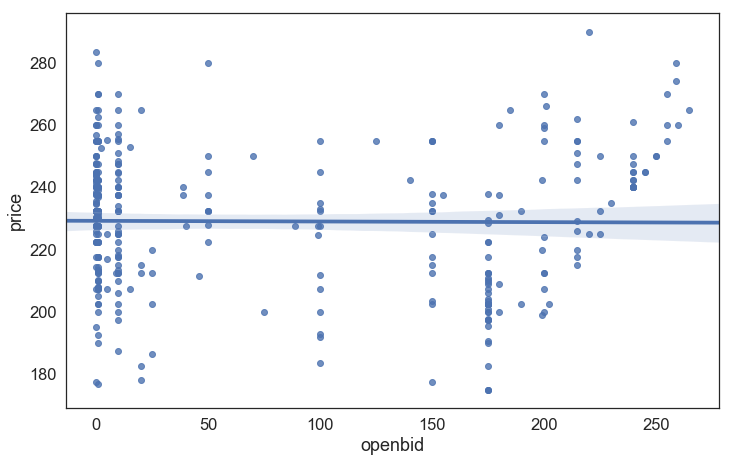

In [126]:
# Take a glimpse at the dataset
print(auctions.info())

# Model price vs. opening bid using auctions
mdl_price_vs_openbid = ols("price ~ openbid", data = auctions).fit()

# See the result
print(mdl_price_vs_openbid.params)

# Plot the scatter plot pf price vs. openbid with a linear trend line
sns.regplot(x='openbid', y='price', data=auctions)

# Show the plot
plt.show()

The slope coefficient is small enough that it might as well be zero. That is, opening bid appears to have no effect on the final sale price for Palm Pilots.

### Modeling each auction type
You just saw that the opening bid price appeared not to affect the final sale price of Palm Pilots in the eBay auctions. Now let's look at what happens when you model the three auction types (3 day, 5 day, and 7 day) separately.

auctions is available.

In [127]:
# Fit linear regression of price vs. opening bid and auction 
# type, with an interaction, without intercept
mdl_price_vs_both = ols("price ~ auction_type + openbid:auction_type + 0", data=auctions).fit()

# See the result
print(mdl_price_vs_both.params)

auction_type[3 day auction]            226.369005
auction_type[5 day auction]            221.599320
auction_type[7 day auction]            231.602861
openbid:auction_type[3 day auction]     -0.029026
openbid:auction_type[5 day auction]      0.084014
openbid:auction_type[7 day auction]      0.003682
dtype: float64


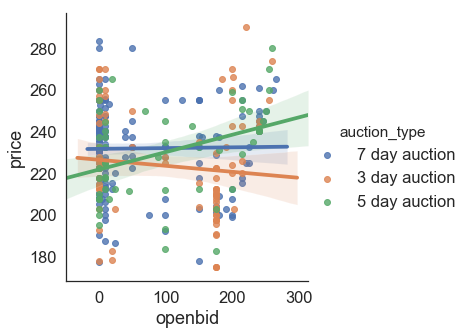

In [128]:
# Fit linear regression of price vs. opening bid and auction 
# type, with an interaction, without intercept
mdl_price_vs_both = ols("price ~ auction_type + openbid:auction_type + 0", data=auctions).fit()

# Using auctions, plot price vs. opening bid colored by
# auction type as a scatter plot with linear regr'n trend lines
sns.lmplot(x='openbid',y='price',data=auctions,hue='auction_type')

# Show the plot
plt.show()


#### Question
Which statement about the model resolves Simpson's Paradox?

The two models disagree, and the best model to take advice from depends upon the question we are trying to solve.

Interpreting models is a subtle art, and your conclusions need to be based on the question you are trying to answer. Here, the answer to 'Does opening bid affect final sale price?' is no overall, but the answer to 'Does opening bid price affect final sale price for any type of auction?' is yes, for 5 day auctions.

### Two numeric explanatory variables

In previous sections, the models had 1 numeric response + 1 numeric & 1 categorical explan. variable. Now let's study the case where we have 1 numeric response, and multiple numeric explanatory variables.

To visualize at least 3 numeric variables, either we go towards 3D plotting, or we use 2D scatter plots with facetting/grid.

3D plots are great if they are interactive, but when they are static, they are not of much help.

### Visualizing three numeric variables
There are also some "flat" alternatives to 3D plots that provide easier interpretation, though they require a little thinking about to make. A good approach is plotting the two numeric explanatory variables on the x- and y-axis of a scatter plot, and color the points according to the response variable.

taiwan_real_estate is available.

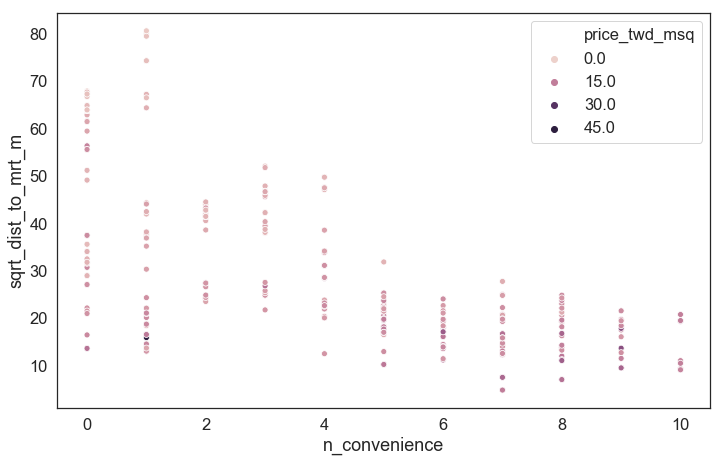

In [129]:
# Transform dist_to_mrt_m to sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate['dist_to_mrt_m'])

# Draw a scatter plot of sqrt_dist_to_mrt_m vs. n_convenience
# colored by price_twd_msq
sns.scatterplot(x='n_convenience',y='sqrt_dist_to_mrt_m',data=taiwan_real_estate,hue='price_twd_msq')

# Show the plot
plt.show()

Using color for the numeric response variable is a great alternative for 3D scatter plots. The plot suggests that prices are higher when more convenience stores are nearby or when the distance to the nearest MRT station is short. Additionally, there tend to be more convenience stores when the nearest MRT station is close.

### Modeling two numeric explanatory variables
You already saw how to make a model and predictions with a numeric and a categorical explanatory variable. The code for modeling and predicting with two numeric explanatory variables is the same, other than a slight difference in how to specify the explanatory variables to make predictions against.

Here you'll model and predict the house prices against the number of nearby convenience stores and the square-root of the distance to the nearest MRT station.

taiwan_real_estate is available with the square-root transformed variable sqrt_dist_to_mrt_m. itertools.product is also loaded.

In [130]:
# Fit the linear regression of price vs. no. of conv. stores
# and sqrt dist. to nearest MRT, no interaction
mdl_price_vs_conv_dist = ols('price_twd_msq~n_convenience+sqrt_dist_to_mrt_m', data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_conv_dist.params)

Intercept             15.103790
n_convenience          0.214221
sqrt_dist_to_mrt_m    -0.157300
dtype: float64


In [131]:
# Fit the linear regression of price vs. no. of conv. stores
# and sqrt dist. to nearest MRT, no interaction
mdl_price_vs_conv_dist = ols("price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)

# Create p as all combinations of values of n_convenience and sqrt_dist_to_mrt_m
p = product(n_convenience, sqrt_dist_to_mrt_m)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "sqrt_dist_to_mrt_m"])

# Add column of predictions
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv_dist.predict(explanatory_data))
    
# See the result  
print(prediction_data.head(n=10))


   n_convenience  sqrt_dist_to_mrt_m  price_twd_msq
0              0                   0      15.103790
1              0                  10      13.530787
2              0                  20      11.957784
3              0                  30      10.384781
4              0                  40       8.811778
5              0                  50       7.238775
6              0                  60       5.665772
7              0                  70       4.092769
8              0                  80       2.519766
9              1                   0      15.318010


The modeling and prediction flow for two numeric variables is just as it was for the previous case that included a categorical variable. statsmodels automatically handles this different scenario. Now let's plot these predictions and see how they match with the actual data points.

### Visualizing two numeric explanatory variables
The code for visualizing two numeric explanatory variables is the same as you've seen before: create a layer of the actual data points, and add a layer of the prediction points to see how they match. In the case of two numeric explanatory variables, the prediction point layer will look like a grid.

taiwan_real_estate and prediction_data are available with the square-root transformed variable sqrt_dist_to_mrt_m.

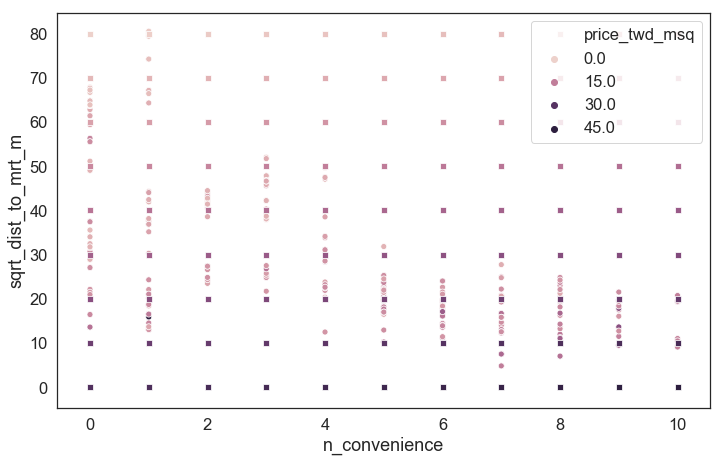

In [132]:
# Create scatter plot of taiwan_real_estate
sns.scatterplot(x='n_convenience', y='sqrt_dist_to_mrt_m', data=taiwan_real_estate, hue='price_twd_msq')

# Create scatter plot of prediction_data without legend
sns.scatterplot(x='n_convenience', y='sqrt_dist_to_mrt_m', data=prediction_data,hue='price_twd_msq', legend=False, marker="s")

# Show the plot
plt.show()

Plotting a colored grid of predictions can give you a general idea of how your model performs. The prediction grid confirms that your model is a good fit: prices are higher when more convenience stores are nearby or when the distance to the nearest MRT station is short.

### Including an interaction
Just as in the case with one numeric and one categorical explanatory variable, it is possible that numeric explanatory variables can interact. With this model structure, you'll get a third slope coefficient: one for each explanatory variable and one for the interaction.

Here you'll run, predict, and plot the same model as in the previous exercise, but this time including an interaction between the explanatory variables.

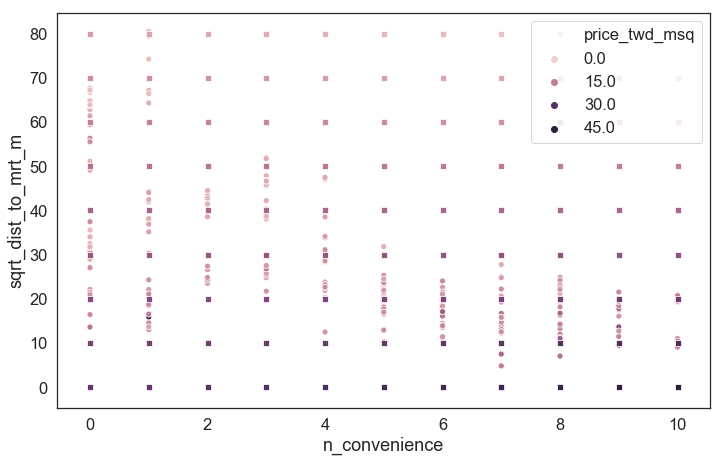

In [133]:
# Convert to mdl_price_vs_conv_dist_inter
mdl_price_vs_conv_dist_inter = ols("price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m + n_convenience*sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Create prediction data
n_convenience = np.arange(0, 11)
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)
p = product(n_convenience, sqrt_dist_to_mrt_m)
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "sqrt_dist_to_mrt_m"])
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv_dist_inter.predict(explanatory_data))

# Create scatter plot of taiwan_real_estate
sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=taiwan_real_estate, hue="price_twd_msq")

# Create scatter plot of prediction_data without legend
sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=prediction_data, hue="price_twd_msq", legend=False, marker="s")

# Show the plot
plt.show()


 Although the predictions from the model are different now that the interaction is included, the code to create them is the same. The resulting prediction grid for the model including an interaction is in this case also not much different from the model without an interaction.

### More than two explanatory variables

With more variables, we can use faceting.
The only problem with more explanatory variables is that it adds-up complexity in terms of interactions.

We can even use two-ways or even three-ways interactions between pairs of variables.

### Visualizing many variables
As you begin to consider more variables, plotting them all at the same time becomes increasingly difficult. In addition to using x and y scales for two numeric variables, you can use color for a third numeric variable, and you can use faceting for categorical variables. And that's about your limit before the plots become to difficult to interpret. There are some specialist plot types like correlation heatmaps and parallel coordinates plots that will handle more variables, but they give you much less information about each variable, and they aren't great for visualizing model predictions.

Here you'll push the limits of the scatter plot by showing the house price, the distance to the MRT station, the number of nearby convenience stores, and the house age, all together in one plot.

taiwan_real_estate is available.

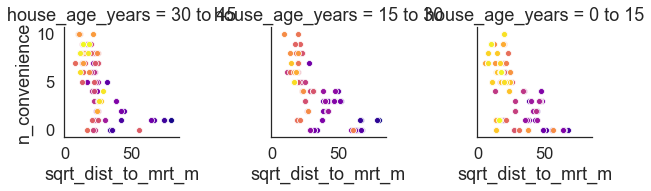

In [134]:
# Prepare the grid using taiwan_real_estate, for each house age category,
# colored by price_twd_msq
grid = sns.FacetGrid(data=taiwan_real_estate,
            col="house_age_years",
            hue="price_twd_msq",
            palette="plasma")

# Plot the scatterplots with sqrt_dist_to_mrt_m on the x-axis
# and n_convenience on the y axis
grid.map(sns.scatterplot,
         "sqrt_dist_to_mrt_m",
         "n_convenience")

# Show the plot (brighter colors mean higher prices)
plt.show()

The plot shows the same as before: house price increases with shorter distances to the nearest MRT station, and increases with the number of nearby convenience stores. Faceting by house age suggests that this effect is similar for all house age groups. As you add more variables, it becomes increasingly challenging to create an easily interpretable plot.

### Different levels of interaction
Once you have three explanatory variables, the number of options for specifying interactions increases. You can specify no interactions. You can specify 2-way interactions, which gives you model coefficients for each pair of variables. The third option is to specify all the interactions, which means the three 2-way interactions and the interaction between all three explanatory variables.

As the number of explanatory variables increases further, the number of interaction possibilities rapidly increases.

taiwan_real_estate is available.

In [135]:
# Model price vs. no. of conv. stores, sqrt dist. to MRT 
# station & house age, no global intercept, no interactions
mdl_price_vs_all_no_inter = ols('price_twd_msq~n_convenience+sqrt_dist_to_mrt_m+house_age_years', data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_no_inter.params)

Intercept                      15.474464
house_age_years[T.15 to 30]    -1.344405
house_age_years[T.30 to 45]    -1.708970
n_convenience                   0.257666
sqrt_dist_to_mrt_m             -0.148102
dtype: float64


In [136]:
# Model price vs. sqrt dist. to MRT station, no. of conv.
# stores & house age, no global intercept, 3-way interactions
mdl_price_vs_all_3_way_inter = ols("price_twd_msq ~ n_convenience * sqrt_dist_to_mrt_m * house_age_years + 0",
                                   data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_3_way_inter.params)

house_age_years[0 to 15]                                        16.046849
house_age_years[15 to 30]                                       13.760066
house_age_years[30 to 45]                                       12.088773
n_convenience                                                    0.374982
n_convenience:house_age_years[T.15 to 30]                        0.078370
n_convenience:house_age_years[T.30 to 45]                        0.066720
sqrt_dist_to_mrt_m                                              -0.162944
sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]                   0.036618
sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]                   0.061281
n_convenience:sqrt_dist_to_mrt_m                                -0.008393
n_convenience:sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]    -0.003821
n_convenience:sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]     0.004401
dtype: float64


In [137]:
# Model price vs. sqrt dist. to MRT station, no. of conv.
# stores & house age, no global intercept, 2-way interactions
mdl_price_vs_all_2_way_inter = ols("price_twd_msq ~ (sqrt_dist_to_mrt_m + n_convenience + house_age_years) ** 2 + 0",
                                   data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_2_way_inter.params)

house_age_years[0 to 15]                          16.026633
house_age_years[15 to 30]                         13.880791
house_age_years[30 to 45]                         11.926904
sqrt_dist_to_mrt_m                                -0.162025
sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]     0.031600
sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]     0.068198
n_convenience                                      0.384914
n_convenience:house_age_years[T.15 to 30]         -0.006894
n_convenience:house_age_years[T.30 to 45]          0.143416
sqrt_dist_to_mrt_m:n_convenience                  -0.008956
dtype: float64


The formula syntax is flexible enough to provide precise control over which interactions are specified.

Predicting again
You've followed the prediction workflow several times now with different combinations of explanatory variables. Time to try it once more on the model with three explanatory variables. Here, you'll use the model with 3-way interactions, though the code is the same when using any of the three models from the previous exercise.

taiwan_real_estate and mdl_price_vs_all_3_way_inter are available. itertools.product is loaded

In [138]:
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)

# Create house_age_years with unique values
house_age_years = taiwan_real_estate['house_age_years'].unique()

# Create p as all combinations of n_convenience, sqrt_dist_to_mrt_m,
# and house_age_years, in that order
p = product(n_convenience, sqrt_dist_to_mrt_m, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=['n_convenience','sqrt_dist_to_mrt_m','house_age_years'])

# See the result
print(explanatory_data.head(n=10))

   n_convenience  sqrt_dist_to_mrt_m house_age_years
0              0                   0        30 to 45
1              0                   0        15 to 30
2              0                   0         0 to 15
3              0                  10        30 to 45
4              0                  10        15 to 30
5              0                  10         0 to 15
6              0                  20        30 to 45
7              0                  20        15 to 30
8              0                  20         0 to 15
9              0                  30        30 to 45


In [139]:
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)

# Create house_age_years with unique values
house_age_years = taiwan_real_estate["house_age_years"].unique()

# Create p as all combinations of n_convenience, sqrt_dist_to_mrt_m,
# and house_age_years, in that order
p = product(n_convenience, sqrt_dist_to_mrt_m, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["n_convenience",
                                            "sqrt_dist_to_mrt_m",
                                            "house_age_years"])

# Add column of predictions
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_all_3_way_inter.predict(explanatory_data)
)

# See the result
print(prediction_data.head(n=10))

   n_convenience  sqrt_dist_to_mrt_m house_age_years  price_twd_msq
0              0                   0        30 to 45      12.088773
1              0                   0        15 to 30      13.760066
2              0                   0         0 to 15      16.046849
3              0                  10        30 to 45      11.072148
4              0                  10        15 to 30      12.496811
5              0                  10         0 to 15      14.417411
6              0                  20        30 to 45      10.055524
7              0                  20        15 to 30      11.233557
8              0                  20         0 to 15      12.787972
9              0                  30        30 to 45       9.038900


Notice how rapidly the dimensions of the prediction data increase when you are adding more and more variables.

Sum of squares is a measure of how far the predicted responses are from the actual responses, so a smaller number is better.

### Linear regression algorithm & Understanding how it works.
To truly understand linear regression, it is helpful to know how the algorithm works. The code for ols() is hundreds of lines because it has to work with any formula and any dataset. However, in the case of simple linear regression for a single dataset, you can implement a linear regression algorithm in just a few lines of code.

In [140]:
# # Complete the function
# def calc_sum_of_squares(coeffs):
#     # Unpack coeffs
#     intercept, slope = coeffs
#     # Calculate predicted y-values
#     y_pred = intercept + slope * x_actual
#     # Calculate differences between y_actual and y_pred
#     y_diff = y_pred - y_actual
#     # Calculate sum of squares
#     sum_sq = np.sum(y_diff ** 2)
#     # Return sum of squares
#     return sum_sq
  
# # Test the function with intercept 10 and slope 1
# print(calc_sum_of_squares([10, 1]))

In [141]:
# # Complete the function
# def calc_sum_of_squares(coeffs):
#     # Unpack coeffs
#     intercept, slope = coeffs
#     # Calculate predicted y-values
#     y_pred = intercept + slope * x_actual
#     # Calculate differences between y_actual and y_pred
#     y_diff = y_pred - y_actual
#     # Calculate sum of squares
#     sum_sq = np.sum(y_diff ** 2)
#     # Return sum of squares
#     return sum_sq

# # Call minimize on calc_sum_of_squares  
# print(minimize(fun=calc_sum_of_squares,
#                x0=[0, 0]))

# # Compare the output with the ols() call.
# print(ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate).fit().params)
  

The results you got here with just a few lines of code are identical to the finely-tuned results from ols(). All you needed was a function to calculate the sum of squares metric, and the minimize() function worked its magic to find where this function had its minimum value. On to the last chapter!

### Multiple Logic Regression

### Logistic regression with two explanatory variables
Logistic regression also supports multiple explanatory variables. To include multiple explanatory variables in logistic regression models, the syntax is the same as for linear regressions.

Here you'll fit a model of churn status with both of the explanatory variables from the dataset: the length of customer relationship and the recency of purchase.

churn is available.

- Pre-processing

In [142]:
churn = pd.read_csv('churn.csv')
print(churn.head())

   has_churned  time_since_first_purchase  time_since_last_purchase
0            0                  -1.089221                 -0.721322
1            0                   1.182983                  3.634435
2            0                  -0.846156                 -0.427582
3            0                   0.086942                 -0.535672
4            0                  -1.166642                 -0.672640


In [143]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn status vs. length of
# relationship, recency, and an interaction
mdl_churn_vs_both_inter = logit('has_churned~time_since_first_purchase*time_since_last_purchase', data=churn).fit()

# Print the coefficients
print(mdl_churn_vs_both_inter.params)

Optimization terminated successfully.
         Current function value: 0.649717
         Iterations 5
Intercept                                            -0.150534
time_since_first_purchase                            -0.637642
time_since_last_purchase                              0.423284
time_since_first_purchase:time_since_last_purchase    0.112250
dtype: float64


The formula syntax for including multiple explanatory variables is the same for logistic regression as it is for linear regression.

### Logistic regression prediction
As with linear regression, the joy of logistic regression is that you can make predictions. Let's step through the prediction flow one more time!

churn and mdl_churn_vs_both_inter are available; itertools.product is loaded.

In [144]:
# Create time_since_first_purchase
time_since_first_purchase = np.arange(-2, 4.1, 0.1)

# Create time_since_last_purchase
time_since_last_purchase = np.arange(-1, 6.1, 0.1)

# Create p as all combinations of values of
# time_since_first_purchase and time_since_last_purchase
p = product(time_since_first_purchase, time_since_last_purchase)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["time_since_first_purchase",
                                            "time_since_last_purchase"])

# Print the result
print(explanatory_data.head(n=10))

   time_since_first_purchase  time_since_last_purchase
0                       -2.0                      -1.0
1                       -2.0                      -0.9
2                       -2.0                      -0.8
3                       -2.0                      -0.7
4                       -2.0                      -0.6
5                       -2.0                      -0.5
6                       -2.0                      -0.4
7                       -2.0                      -0.3
8                       -2.0                      -0.2
9                       -2.0                      -0.1


In [145]:
# Create time_since_first_purchase
time_since_first_purchase = np.arange(-2, 4.1, 0.1)

# Create time_since_last_purchase
time_since_last_purchase = np.arange(-1, 6.1, 0.1)

# Create p as all combinations of values of
# time_since_first_purchase and time_since_last_purchase
p = product(time_since_first_purchase, time_since_last_purchase)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["time_since_first_purchase",
                                            "time_since_last_purchase"])

# Create prediction_data
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_both_inter.predict(explanatory_data))

# Create most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

# See the result
print(prediction_data.head(n=10))

   time_since_first_purchase  time_since_last_purchase  has_churned  \
0                       -2.0                      -1.0     0.716256   
1                       -2.0                      -0.9     0.720279   
2                       -2.0                      -0.8     0.724266   
3                       -2.0                      -0.7     0.728218   
4                       -2.0                      -0.6     0.732134   
5                       -2.0                      -0.5     0.736015   
6                       -2.0                      -0.4     0.739859   
7                       -2.0                      -0.3     0.743667   
8                       -2.0                      -0.2     0.747438   
9                       -2.0                      -0.1     0.751172   

   most_likely_outcome  
0                  1.0  
1                  1.0  
2                  1.0  
3                  1.0  
4                  1.0  
5                  1.0  
6                  1.0  
7                 

The prediction workflow should be familiar now: you've seen it many times before. Let's now visualize both the actual and predicted churn data.

### Visualizing multiple explanatory variables
Plotting has similar issues as with the linear regression case: it quickly becomes difficult to include more numeric variables in the plot. Here you'll look at the case of two numeric explanatory variables, and the solution is basically the same as before: use color to denote the response.

Here there are only two possible values of response (zero and one), both in the actual dataset and the predicted dataset.

churn and prediction_data are available.

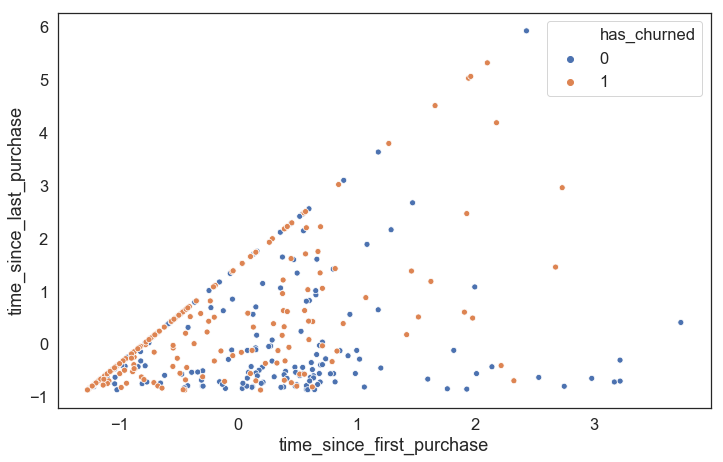

In [146]:
# Using churn, plot recency vs. length of relationship,
# colored by churn status
sns.scatterplot(x='time_since_first_purchase',y='time_since_last_purchase',data=churn,hue='has_churned')

# Show the plot
plt.show()

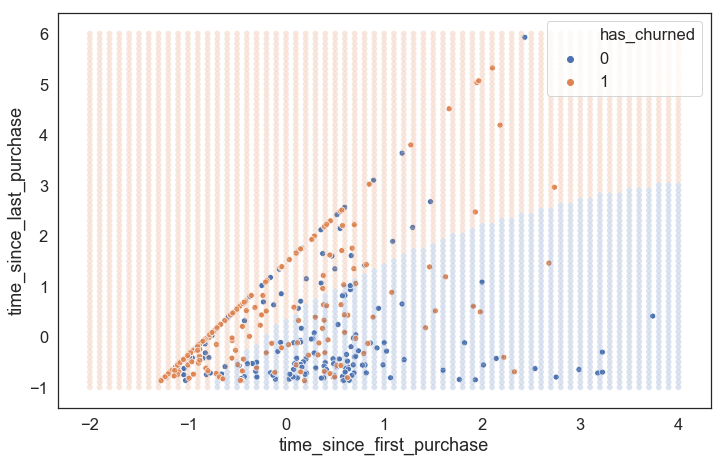

In [147]:
# Using churn, plot recency vs. length of relationship,
# colored by churn status
sns.scatterplot(x="time_since_first_purchase",
                y="time_since_last_purchase",
                data=churn, 
                hue="has_churned")

# Using prediction_data, plot recency vs. length of relationship,
# colored by most_likely_outcome
sns.scatterplot(x="time_since_first_purchase",
                y="time_since_last_purchase",data=prediction_data, hue='most_likely_outcome',
     alpha=0.2,
     legend=False)

# Show the plot
plt.show()

The reason why the data points lie on or to the right of the diagonal line is due to nature of the data: the time since the last purchase can't exceed the time since the first purchase. Also notice the pattern of the prediction data: longer customer relationships and shorter purchase recency predicts lower churns.

### Confusion matrix
When the response variable has just two outcomes, like the case of churn, the measures of success for the model are "how many cases where the customer churned did the model correctly predict?" and "how many cases where the customer didn't churn did the model correctly predict?". These can be found by generating a confusion matrix and calculating summary metrics on it.

In [148]:
# Create conf_matrix
conf_matrix = mdl_churn_vs_both_inter.pred_table()
print(mdl_churn_vs_both_inter.summary())
# Print it
print(conf_matrix)

# conf_matrix = pd.crosstab(churn['has_churned'], churn['has_churned'], rownames=['Actual'], colnames=['Predicted'])
# print(conf_matrix)


                           Logit Regression Results                           
Dep. Variable:            has_churned   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Fri, 16 Apr 2021   Pseudo R-squ.:                 0.06266
Time:                        10:14:58   Log-Likelihood:                -259.89
converged:                       True   LL-Null:                       -277.26
                                        LLR p-value:                 1.380e-07
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                             -0.1505      0.113     -1.337      0.181      -0.371       0.070
time_since_

In [149]:
# Create conf_matrix
conf_matrix = mdl_churn_vs_both_inter.pred_table()

# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + FN + FP + TP)
print("accuracy", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (TP + FN)
print("sensitivity", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity", specificity)

accuracy 0.6225
sensitivity 0.735
specificity 0.51


Generating a confusion matrix and calculating metrics like accuracy, sensitivity, and specificity is the standard way to measure how well a logistic model fits. Higher accuracy, sensitivity, and specificity is better, though there is often a trade-off between sensitivity and specificity. Compared to the previous course where you calculated the metrics for the model with a single explanatory variable, accuracy and sensitivity increased, but specificity decreased.

### Logistic probability density function (PDF)

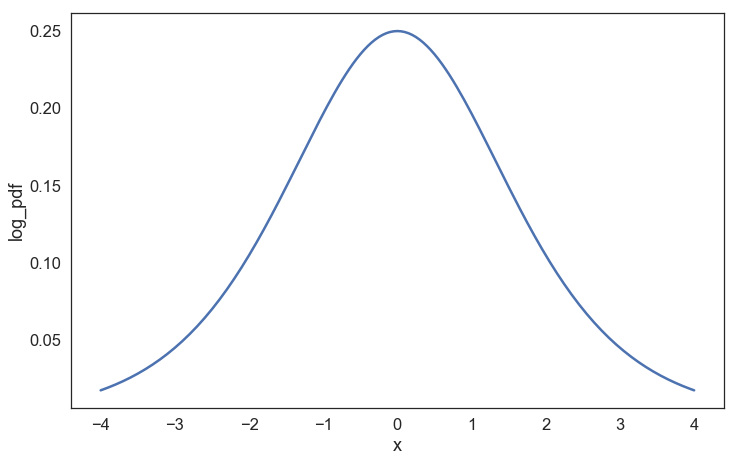

In [150]:
from scipy.stats import logistic

x = np.arange(-4, 4.05, 0.05)
logistic_dist = pd.DataFrame({"x": x, "log_pdf": logistic.pdf(x)})
sns.lineplot(x="x", y="log_pdf", data=logistic_dist)

### Logistic Cumulative distribution function
Understanding the logistic distribution is key to understanding logistic regression. Like the normal (Gaussian) distribution, it is a probability distribution of a single continuous variable. Here you'll visualize the cumulative distribution function (CDF) for the logistic distribution. That is, if you have a logistically distributed variable, x, and a possible value, xval, that x could take, then the CDF gives the probability that x is less than xval.

The logistic distribution's CDF is calculated with the logistic function (hence the name). The plot of this has an S-shape, known as a sigmoid curve. An important property of this function is that it takes an input that can be any number from minus infinity to infinity, and returns a value between zero and one.

In [151]:
# Import logistic
from scipy.stats import logistic

# Create x ranging from minus ten to ten in steps of 0.1
x = np.arange(-10, 10.1, .1)

In [152]:
# Import logistic
from scipy.stats import logistic

# Create x ranging from minus ten to ten in steps of 0.1
x = np.arange(-10, 10.1, 0.1)

# Create logistic_dist
logistic_dist = pd.DataFrame({"x": x,
                              "log_cdf": logistic.cdf(x),
                              "log_cdf_man": 1 / (1 + np.exp(-x))})

# Check that each logistic function gives the same results
print(np.array_equal(logistic_dist["log_cdf_man"], logistic_dist["log_cdf_man"]))

True


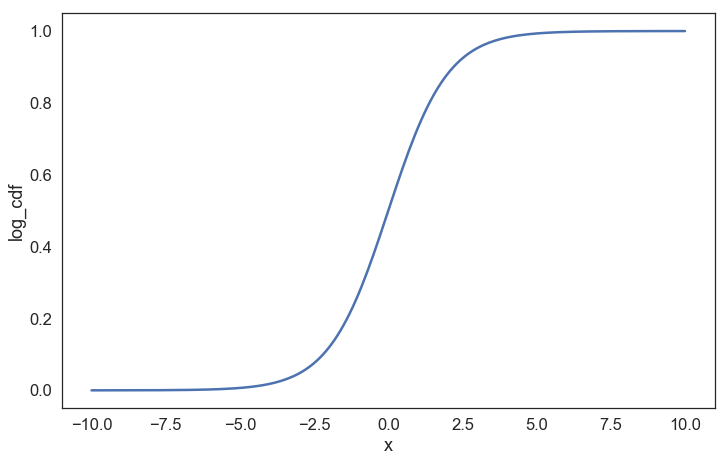

In [153]:
# Import logistic
from scipy.stats import logistic

# Create x ranging from minus ten to ten in steps of 0.1
x = np.arange(-10, 10.1, 0.1)

# Create logistic_dist
logistic_dist = pd.DataFrame({"x": x,
                              "log_cdf": logistic.cdf(x),
                              "log_cdf_man": 1 / (1 + np.exp(-x))})

# Using logistic_dist, plot log_cdf vs. x
sns.lineplot(x="x", y="log_cdf", data=logistic_dist)

# Show the plot
plt.show()

The logistic distribution's cumulative distribution function has an "S" shape, known as a sigmoid curve.

Inverse cumulative distribution function
The logistic function (logistic distribution CDF) has another important property: each x input value is transformed to a unique value. That means that the transformation can be reversed. The logit function is the name for the inverse logistic function, which is also the logistic distribution inverse cumulative distribution function. (All three terms mean exactly the same thing.)

The logit function takes values between zero and one, and returns values between minus infinity and infinity.

### Gaussian probability density function (PDF)

In [163]:
from scipy.stats import norm

x = np.arange(-4, 4.05, 0.05)

gauss_dist = pd.DataFrame({"x": x, "gauss_pdf": norm.pdf(x)})

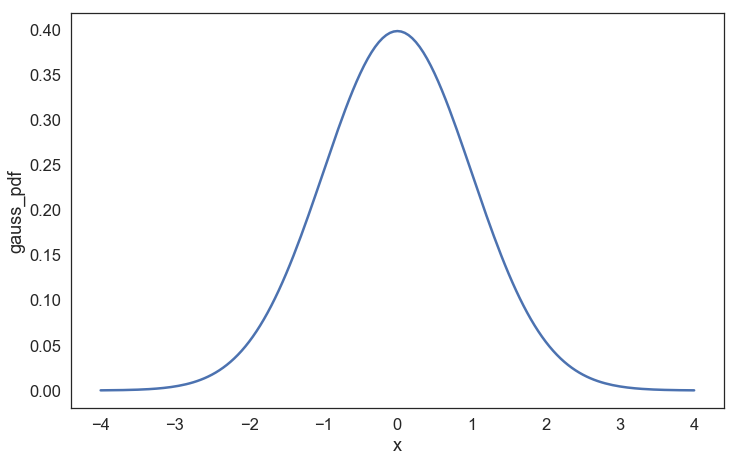

In [164]:
sns.lineplot(x="x", y="gauss_pdf", data=gauss_dist)

### Gaussian Cumulative distribution function

In [156]:
x = np.arange(-4, 4.05, 0.05)

gauss_dist = pd.DataFrame({"x": x, "gauss_pdf": norm.pdf(x), "gauss_cdf": norm.cdf(x)})

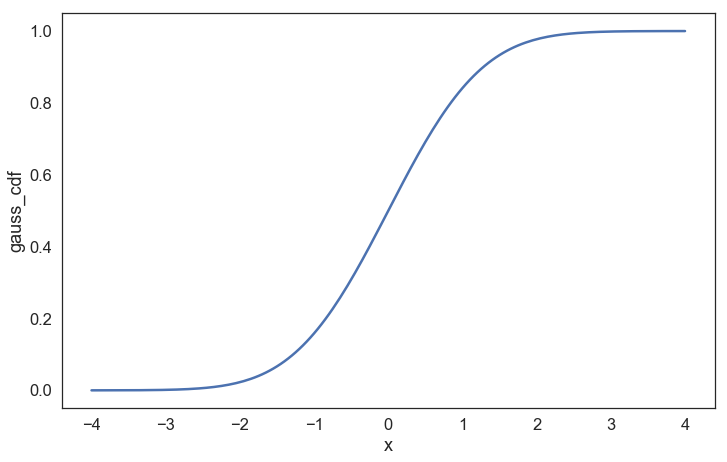

In [157]:
sns.lineplot(x="x", y="gauss_cdf", data=gauss_dist)

### Inverse cumulative distribution function
The logistic function (logistic distribution CDF) has another important property: each x input value is transformed to a unique value. That means that the transformation can be reversed. The logit function is the name for the inverse logistic function, which is also the logistic distribution inverse cumulative distribution function. (All three terms mean exactly the same thing.)

The logit function takes values between zero and one, and returns values between minus infinity and infinity.

In [158]:
# Create p ranging from minus 0.001 to 0.999 in steps of 0.001
p = np.arange(0.001, 1, 0.001)

# Create logistic_dist_inv
logistic_dist_inv = pd.DataFrame({"p": p,
                                  "logit": logistic.ppf(p),
                                  "logit_man": np.log(p / (1 - p))})

# Check that each logistic function gives the same results
print(np.array_equal(logistic_dist_inv["logit"], logistic_dist_inv["logit_man"]))

False


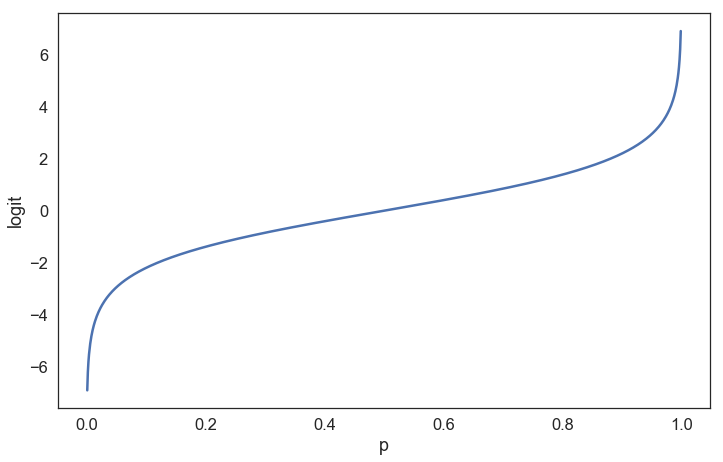

In [159]:
# Create p ranging from minus 0.001 to 0.999 in steps of 0.001
p = np.arange(0.001, 1, 0.001)

# Create logistic_dist_inv
logistic_dist_inv = pd.DataFrame({"p": p,
                                  "logit": logistic.ppf(p),
                                  "logit_man": np.log(p / (1 - p))})

# Using logistic_dist_inv, plot logit vs. p
sns.lineplot(x="p", y="logit", data=logistic_dist_inv)

# Show the plot
plt.show()

The inverse CDF is the "opposite" transformation to the CDF. If you flip the x and y axes on this plot, you get the same plot you saw in the previous exercise.

The logistic distribution consists of a whole family of curves specified by the location and scale parameters. This allows logistic model prediction curves to have different positions or steepnesses.

### How logistic regression works & measuring model fit

1. Likelihood

2. Log-Likelihood

### Likelihood & log-likelihood
Linear regression tries to optimize a "sum of squares" metric in order to find the best fit. That metric isn't applicable to logistic regression. Instead, logistic regression tries to optimize a metric called likelihood, or a related metric called log-likelihood.

The dashboard shows churn status versus time since last purchase from the churn dataset. The blue dotted line is the logistic regression prediction line. (That is, it's the "best fit" line.) The black solid line shows a prediction line calculated from the intercept and slope coefficients you specify as logistic.cdf(intercept + slope * time_since_last_purchase).

Change the intercept and slope coefficients and watch how the likelihood and log-likelihood values change.

As you get closer to the best fit line, what statement is true about likelihood and log-likelihood?

Both likelihood and log-likelihood increase to a maximum value. Logistic regression chooses the prediction line that gives you the maximum likelihood value. It also gives maximum log-likelihood.

### Logistic regression algorithm
Let's dig into the internals and implement a logistic regression algorithm. Since statsmodels's logit() function is very complex, you'll stick to implementing simple logistic regression for a single dataset.

Rather than using sum of squares as the metric, we want to use likelihood. However, log-likelihood is more computationally stable, so we'll use that instead. Actually, there is one more change: since we want to maximize log-likelihood, but minimize() defaults to finding minimum values, it is easier to calculate the negative log-likelihood.

The log-likelihood value for each observation is

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>l</mi>
  <mi>o</mi>
  <mi>g</mi>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>y</mi>
    <mrow>
      <mi>p</mi>
      <mi>r</mi>
      <mi>e</mi>
      <mi>d</mi>
    </mrow>
  </msub>
  <mo stretchy="false">)</mo>
  <mo>&#x2217;</mo>
  <msub>
    <mi>y</mi>
    <mrow>
      <mi>a</mi>
      <mi>c</mi>
      <mi>t</mi>
      <mi>u</mi>
      <mi>a</mi>
      <mi>l</mi>
    </mrow>
  </msub>
  <mo>+</mo>
  <mi>l</mi>
  <mi>o</mi>
  <mi>g</mi>
  <mo stretchy="false">(</mo>
  <mn>1</mn>
  <mo>&#x2212;</mo>
  <msub>
    <mi>y</mi>
    <mrow>
      <mi>p</mi>
      <mi>r</mi>
      <mi>e</mi>
      <mi>d</mi>
    </mrow>
  </msub>
  <mo stretchy="false">)</mo>
  <mo>&#x2217;</mo>
  <mo stretchy="false">(</mo>
  <mn>1</mn>
  <mo>&#x2212;</mo>
  <msub>
    <mi>y</mi>
    <mrow>
      <mi>a</mi>
      <mi>c</mi>
      <mi>t</mi>
      <mi>u</mi>
      <mi>a</mi>
      <mi>l</mi>
    </mrow>
  </msub>
  <mo stretchy="false">)</mo>
</math>

The metric to calculate is the negative sum of these log-likelihood contributions.

The explanatory values (the time_since_last_purchase column of churn) are available as x_actual. The response values (the has_churned column of churn) are available as y_actual. logistic is imported from scipy.stats, and logit() and minimize() are also loaded.


In [160]:
# # Complete the function
# def calc_neg_log_likelihood(coeffs):
#     # Unpack coeffs
#     intercept, slope = coeffs
#     # Calculate predicted y-values
#     y_pred = logistic.cdf(intercept + slope * x_actual)
#     # Calculate log-likelihood
#     log_likelihood = np.log(y_pred) * y_actual + np.log(1 - y_pred) * (1 - y_actual)
#     # Calculate negative sum of log_likelihood
#     neg_sum_ll = -np.sum(log_likelihood)
#     # Return negative sum of log_likelihood
#     return neg_sum_ll

# # Test the function with intercept 10 and slope 1
# print(calc_neg_log_likelihood([10, 1]))

In [161]:
# # Complete the function
# def calc_neg_log_likelihood(coeffs):
#     # Unpack coeffs
#     intercept, slope = coeffs
#     # Calculate predicted y-values
#     y_pred = logistic.cdf(intercept + slope * x_actual)
#     # Calculate log-likelihood
#     log_likelihood = np.log(y_pred) * y_actual + np.log(1 - y_pred) * (1 - y_actual)
#     # Calculate negative sum of log_likelihood
#     neg_sum_ll = -np.sum(log_likelihood)
#     # Return negative sum of log_likelihood
#     return neg_sum_ll
  
# # Call minimize on calc_sum_of_squares  
# print(minimize(fun=calc_neg_log_likelihood,
#                x0=[0, 0]))

# # Compare the output with the logit() call.
# print(logit("has_churned ~ time_since_last_purchase", data=churn).fit().params)

To make a really simple version of logit(), you just needed a function to calculate the negative log-likelihood, and a general-purpose optimization function.